In [30]:
from keras.models import Sequential
from keras.layers import Activation, Conv2D, MaxPool2D, BatchNormalization, Dense, Flatten, Dropout

In [2]:
data_dir = '../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/fruits-360'

In [3]:
train_dir = data_dir + '/Training'
test_dir = data_dir + '/Test'

In [4]:
from os import listdir

In [5]:
labels_str = [d for d in listdir(train_dir) if not d.startswith('.')]

In [6]:
labels_str.sort()

In [7]:
num_class = len(labels_str)

In [8]:
num_class

95

In [9]:
def one_hot_encode(label, depth=None):
    if depth is None:
        depth = len(set(label))
    n = len(label)
    out = np.zeros((n, depth))
    out[range(n), label] = 1
    return out

In [10]:
import matplotlib.pyplot as plt

In [11]:
%matplotlib inline

In [12]:
import numpy as np

In [13]:
train_data = []
train_labels = []

test_data = []
test_labels = []

for i, label_str in enumerate(labels_str):
    curr_label_dir = train_dir + '/' + label_str
    image_files = listdir(curr_label_dir)
    curr_data = [mpimg.imread(curr_label_dir + '/' + image_file) for image_file in image_files]
    train_labels.extend([i] * len(image_files))
    train_data.append(np.stack(curr_data, axis=0))   
    
for i, label_str in enumerate(labels_str):
    curr_label_dir = test_dir + '/' + label_str
    image_files = listdir(curr_label_dir)
    curr_data = [mpimg.imread(curr_label_dir + '/' + image_file) for image_file in image_files]
    test_labels.extend([i] * len(image_files))
    test_data.append(np.stack(curr_data, axis=0))

In [14]:
train_data = np.concatenate(train_data, axis=0).astype('float32') / 255.0
test_data = np.concatenate(test_data, axis=0).astype('float32') / 255.0

In [15]:
train_data.shape

(48905, 100, 100, 3)

In [16]:
test_data.shape

(16421, 100, 100, 3)

In [17]:
train_labels = one_hot_encode(train_labels)
test_labels = one_hot_encode(test_labels)

In [18]:
train_labels.shape

(48905, 95)

In [19]:
test_labels.shape

(16421, 95)

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(input_shape=(100,100,3), filters=6, kernel_size=(4,4)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D())

model.add(Conv2D(filters=12, kernel_size=(4,4)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D())

model.add(Conv2D(filters=24, kernel_size=(4,4)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D())

model.add(Conv2D(filters=48, kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(units=1024))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(units=num_class))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
result = model.fit(train_data, train_labels, validation_data=(test_data, test_labels), epochs=3, batch_size=24)

Instructions for updating:
Use tf.cast instead.
Train on 48905 samples, validate on 16421 samples
Epoch 1/3
48905/48905 [==============================] - 384s 8ms/step - loss: 0.5739 - acc: 0.8333 - val_loss: 0.5466 - val_acc: 0.8408
Epoch 2/3
48905/48905 [==============================] - 381s 8ms/step - loss: 0.1193 - acc: 0.9610 - val_loss: 0.3034 - val_acc: 0.9094
Epoch 3/3
48905/48905 [==============================] - 381s 8ms/step - loss: 0.0871 - acc: 0.9720 - val_loss: 0.7484 - val_acc: 0.8239


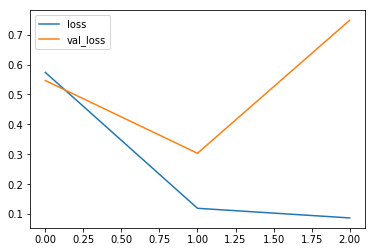

In [24]:
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label='val_loss')
plt.legend()

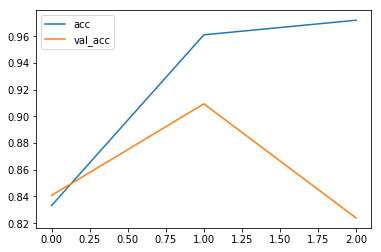

In [25]:
plt.plot(result.history['acc'], label='acc')
plt.plot(result.history['val_acc'], label='val_acc')
plt.legend()

In [33]:
from keras.models import Model, Input
from keras.layers import Activation, Conv2D, MaxPool2D, BatchNormalization, Dense, Flatten, Dropout

In [35]:
i = Input(shape=(100,100,3))
conv1 = Conv2D(filters=6, kernel_size=(4,4))(i)
norm1 = BatchNormalization()(conv1)
relu1 = Activation('relu')(norm1)
mpool1 = MaxPool2D()(relu1)

conv2 = Conv2D(filters=12, kernel_size=(4,4))(mpool1)
norm2 = BatchNormalization()(conv2)
relu2 = Activation('relu')(norm2)
mpool2 = MaxPool2D()(relu2)

conv3 = Conv2D(filters=24, kernel_size=(3,3))(mpool2)
norm3 = BatchNormalization()(conv3)
relu3 = Activation('relu')(norm3)
mpool3 = MaxPool2D()(relu3)

flat = Flatten()(mpool3)
dense1 = Dense(units=1024)(flat)
relu4 = Activation('relu')(dense1)
drop = Dropout(rate=0.5)(relu4)

dense2 = Dense(units=num_class)(drop)
o = Activation('softmax')(dense2)

In [36]:
model2 = Model(inputs=i, outputs=o)

In [37]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
result2 = model2.fit(train_data,
                    train_labels,
                    validation_data=(test_data, test_labels),
                    epochs=3,
                    batch_size=24)

Train on 48905 samples, validate on 16421 samples
Epoch 1/3
48905/48905 [==============================] - 412s 8ms/step - loss: 0.5431 - acc: 0.8456 - val_loss: 0.2893 - val_acc: 0.9110
Epoch 2/3
41904/48905 [========================>.....] - ETA: 54s - loss: 0.1419 - acc: 0.9542

KeyboardInterrupt: 

In [40]:
plt.plot(result2.history['loss'], label='train_loss')
plt.plot(result2.history['val_loss'], label='test_loss')
plt.legend()

NameError: name 'result2' is not defined

In [41]:
plt.plot(result2.history['acc'], label='train acc')
plt.plot(result2.history['val_acc'], label='test_acc')
plt.legend()

NameError: name 'result2' is not defined